# ONE WAY ANOVA

# Table des matières
- [Analyse de la variance à un facteur](attachment:./#Analyse-de-la-variance-à-un-facteur)
- [1. Les boites à moustaches ($boxplots$)](attachment:./#1.-Les-boites-à-moustaches-($boxplots$))
- [2. Modélisation du problème](attachment:./#2.-Modélisation-du-problème)
- [3. Test d'homogénéité de la variance](attachment:./#3.-Test-d'homogénéité-de-la-variance)
- [4. Faire l'aov ($analysis\;of \;variance $)](attachment:./#4.-Faire-l'aov-($analysis\;of-\;variance-$))

# Analyse de la variance à un facteur
 L'ANOVA à un facteur permet d'expliquer une variable quantitative par une variable qualitative.
 Nos données contiennent les observations des concentrations en ($ng/ml$) d'une substance chimique  dans le sang pour un groupe de 10 patients après administration orale de différentes doses ($25,50,100$ et $200$ $mg$) d'un médicament.

In [63]:
display<-function(...){
  imageList<-list(...)
  totalWidth<-0
  maxHeight<-0
  for (img in imageList){
    if(is.character(img))
      img<-readPNG(img)
    dimg<-dim(img)
    totalWidth<-totalWidth+dimg[2]
    maxHeight<-max(maxHeight,dimg[1])
  }
  par(mar=c(0,0,0,0))
  plot(c(0,totalWidth),c(0,maxHeight),type="n",asp=1,xaxt="n",yaxt="n",xlab="x",ylab="y")
  offset<-0
  for (img in imageList){
    dimg<-dim(img)
    rasterImage(img,offset,0,offset+dimg[2],dimg[1])
    offset<-offset+dimg[2]
  }
}

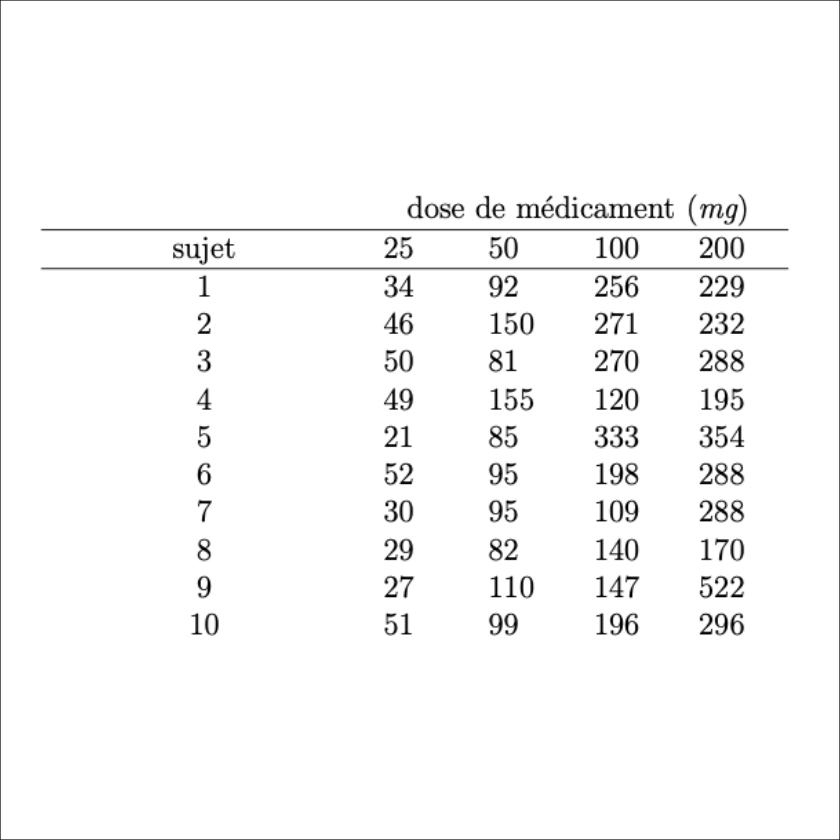

In [67]:
#install.packages("png")
library(png)
img=readPNG("2.png")
display(img)

# 1. Les boites à moustaches ($boxplots$)
Pour chaque modalité de la variable qualitative que nous appellerons dorénavant $X$, nous effectuons un certain nombres d'observations sur un échantillon (10 patients) de la population. Si la moyenne des observations reste constante malgré le changement de modalité de la variable $X$, on en déduit que la variable $X$ n'a pas d'influence sur notre variable quantitative $Y$. 
Le premier travail à faire lors d'une ANOVA est la représentation des boites à moustaches. Sur **GNU-R**, cette représentation peut se faire avec la fonction $boxplot()$.Cependant dans toute la suite, nous utliserons la fonction $plot\_ly()$ disponible dans la $library(plotly)$.

In [2]:
#Lecture des données
chemical=scan("chemical.dat")
#Affichage des données
chemical
#Étiquetage des observations par doses
dose=rep((c("25","50","100","200")),10)
#Affichage
dose

In [41]:
#install.packages("plotly") pour Installation du package "plotly"
library(plotly)
#Les boites à moustaches
plot_ly(x=dose,y=chemical,type = "box",boxpoints="all")
#Calcul des moyennes par niveau de dose
tapply(chemical,dose,mean)

Unsupported

**Interprétation des résultats**

Il semblerait que la dose administrée ait un effet sur la concentration de la substance chimique dans le sang. En effet la moyenne de la concentration est plus élevée lorsque la dose l'est aussi ( $mean(25)=38,9 , mean(50)=104,4 , mean(100)=204 , mean(200)=286,2$ ).

# 2. Modélisation du problème

- La dose $X=(\mathbb{1}_{25},\mathbb{1}_{50},\mathbb{1}_{100},\mathbb{1}_{200})$ représente la variable explicative (qualitative)
- La concentration de la substance dans le sang $Y$ représente la variable expliquée (quantitative)
- Le modèle de regression s'écrit sous la forme suivante : 
  
  $$\boxed{\mathbf{Y=\mu\mathbb{1}+\alpha X +\epsilon \implies y_{ij}=\mu + \alpha_i + \epsilon_{ij}}} $$
  -
 avec $i$( une modalité de $X$) et $j$( une observation de $Y$). Dans notre exemple, $(i,j)\in \{\mathbb{1}_{25},\mathbb{1}_{50},\mathbb{1}_{100},\mathbb{1}_{200}\}*\{1,2,\dots,9,10\}$ .






# 3. Test d'homogénéité de la variance
 
$\begin{cases}
    H_0 : \forall i& \hat{\sigma_i}^2 =\sigma^2\\
    H_1 : \forall i& \hat{\sigma_i}^2 \ne \sigma^2
\end{cases}$

La statistique de test est : 

 $$\omega=\dfrac{(n-p)ln(\hat{\sigma^2})- \sum\limits_j (n_j -1)ln(\hat{\sigma_j^2})}{1+\frac{1}{3(p-1)}\bigg(\sum\limits_j \frac{1}{n_j -1} -\frac{1}{n-p}\bigg)}\rightarrow \chi^{2}_{n-1}$$
 -

Ce test peut être fait sur **GNU-R** par la fonction de test $bartlett.test()$.

In [42]:
bartlett.test(chemical,dose)


	Bartlett test of homogeneity of variances

data:  chemical and dose
Bartlett's K-squared = 33.69, df = 3, p-value = 2.303e-07


**Interprétation**

Pour $\alpha=5\%$, la p-value=$2,303\; 10^{-07} < \alpha$ par conséquent on rejette l'hypothése $H_0$. Cependant, pour pouvoir continuer, $H_0$ ne doit pas être rejetée. Pour y remédier, nous allons appliquer le logarithme-népérien aux observations puis nous referons le test de bartlett.

In [43]:
logChem=log(chemical)
plot_ly(x=dose,y=logChem,type= "box", boxpoints="all")

Unsupported

In [49]:
#On met les deux tableau des bartlett.test pour voir la diff de p-value
bartlett.test(chemical,dose)
bartlett.test(logChem,dose)


	Bartlett test of homogeneity of variances

data:  logChem and dose
Bartlett's K-squared = 2.1285, df = 3, p-value = 0.5462


**Interprétation**

La p-value du test pour le logarithme des observations est supérieure à $\alpha$, donc on rejette pas $H_0$. Autrement dit, il se pourrait que la variance soit homogène.

# 4. Faire l'aov ($analysis\;of \;variance $)

Le logiciel **R** nous permet de faire l'analyse de la variance grâce à la fonction $aov()$. Mais il faut au préalable s'assurer que les étapes vues précédemment sont suivies et respectées. 

In [53]:
chemicalFrame=data.frame(dose,logChem)

In [60]:
chem.aov=aov(logChem~dose,chemicalFrame)
summary(chem.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         3 22.938   7.646   74.72 1.58e-15 ***
Residuals   36  3.684   0.102                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Interprétation**

La somme des carrés totaux notée :

$\underbrace{\sum\limits_{j=1}^{p}\sum\limits_{i=1}^{n_j}(y_{ij}-\overline{y})^2}_{SCT}=\underbrace{\sum\limits_{j=1}^{p}\sum\limits_{i=1}^{n_j}(y_{ij}-\overline{y_j})^2}_{SCR}+\underbrace{\sum\limits_{j=1}^p (\overline{y_j}-\overline{y})^2}_{SCE}$ 
-

où **SCR**( somme des carrés résiduels) et **SCE**(somme des carrés expliqués).

D'après le tableau précédent, $SCE=22.938$,$SCR=3,684$ et la      
**p-value=$1.58\; 10^{-15}<\alpha$, alors l'effet de la dose sur la concentration de la substance dans le sang est significatif**.

**Remarque :** Il est trés utile de tester la normalité des résidus afin de constater si l’hypothèse d’homoscédasticité des résidus est bien vérifiée. Sur **R** ce test peut être réalisé avec $jarque.bera.test()$ avec :

$\begin{cases}
    H_0: Les\; résidus\; suivent\; une\; loi\; normale\\
    H_1: Les \;résidus\; ne\; suivent\; pas\; une\; loi\; normale
\end{cases}$

Le tableau suivant indique que **la p-value=$0,6063>\alpha$ alors on ne rejette pas l'hypothése de normalité des résidus**. On peut donc considérer que les résidus suivent une loi normale.

In [55]:
#install.packages("tseries")
library(tseries)
jarque.bera.test(residuals(chem.aov))


	Jarque Bera Test

data:  residuals(chem.aov)
X-squared = 1.0007, df = 2, p-value = 0.6063


copyright©️ [@seneclasses](https://seneclasses.com/)